SAS & HSE, Applied Time Series Forecasitng , Winter 2024-25

<font color="green"> HW #2 </font>

You can find hw2 bonus part <a href= "https://github.com/aromanenko/ATSF/blob/main/HW2_bonus_part.ipynb">here</a>

<span style="color:black; font-size: 12pt"></span>

Alexey Romanenko,
<font color="blue">alexromsput@gmail.com</font>

<h1 align="center">Organization Info</h1>

**Дополнительный материал для выполнения дз**:
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.

**Оформление дз**:
- Присылайте выполненное задание в anytask (пароли и доступы см в сообщении https://t.me/c/2281312310/5/428)
- Выполненное дз сохраните в файл Surname_w2024_25_hw2.ipynb, например, ivanov_w2024_25_hw2.ipynb

**Вопросы**:
- Присылайте вопросы в телеграмм [группу](https://t.me/+dcFuIel7VaE0YjIy) в соответствующий канал

**Deadline**: <font color="red"> 08-Jan-2025 11:59:59 pm CET </font>

В случае присланного решения позже дедлайна максимальный бал буде снижен согласно формуле (-1 балл за просрочку дедлайна в одну неделю):

$$МаксимальныйБалл=max\bigl(6,(10-ДнейПослеДедлайна/7) \bigr).$$
График зависимости максимально возможного балла за ДЗ от просрочки дедлайна приведён ниже:

In [260]:
import pandas as pd
import numpy as np
import datetime
pd.options.plotting.backend = "plotly"
deadline_dttm = pd.to_datetime('2025-01-08 00:00:00')

pd.DataFrame(data = [[deadline_dttm+datetime.timedelta(days=x)
                          , min(10, max(6, (10-x/7)))] for x in np.linspace(-4,30,35000)],
                          columns = ['Время сдачи ДЗ', 'Максимальный балл']).set_index('Время сдачи ДЗ').\
  plot().update_layout(height=350, width=1350).show()

<h1 align="center">Check Questions (10%)</h1>


**Questions 1: Write down an equation for $y_t$ (in a form $y_t=f\left(y_{t-1}, \ldots,y_{t-n}, \varepsilon_t, \ldots, \varepsilon_{t-m}\right)$)  that corresponds to the following ARIMA models**:
 - 1) ARIMA $(p=0,d=k,q=n)$,
    - <Answer>
    <br></br>
 - 2) ARIMA $(p=1,d=k+1,q=0)(P=1, D=1, Q=0)_s$,   
  - <Answer>
    <br></br>


**Questions 2:** Prove that ARIMA(1,1,2) model is equivalent toDamped-trend linear exponential smoothing
$${\bf(1-\phi B)(1-B)}y_t = {\bf(1-\theta_1 B-\theta_2 B^2)}\varepsilon_t$$
$$\theta_1 = 1+\phi-\alpha-\alpha\beta\phi, \text{ } \theta_2 = (\alpha-1)\phi$$
$\phi$ - coefficient of damped trend;
<Answer>
$${\bf(1-\phi B)(1-B)}y_t = {\bf(1-B-\phi B + \phi B^2)}y_t = y_t - y_{t-1} - \phi (y_{t-1}-y_{t-2})$$
<br></br>


<h1 align="center"> Practice</h1>

In [261]:
# put you name and surname here
name_surname = 'luka_markov' # example 'ivan_ivanov'

ts_number = sum([ord(l) for l in name_surname])//71
print('Your ts number for HW2 is', ts_number)

Your ts number for HW2 is 16


<h2 align="center">  1. Download data for following data sets (10%)</h2>


* 0) Download data
  <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">
  
  <span style="color:blue; font-family:'New Times Roman'; font-size:14pt"> Find your ts <a href = 'https://docs.google.com/spreadsheets/d/1vQrQ5Ea9Mtouxff87ZcMK2CkoDXbXHKqOkAOTgdU454/edit?gid=0#gid=0'>here</a> in sheet "HW2" and download time series data


* 1) plot target ts
* 2) plot cros-series plot: independent variables and target variable on the same subplot
* 3) answer the questions:
    - is there seasonality? If there is seasonality then define period(s) of seasonality.
    - trend?
    - not-stable dispersion?
* 4) define the proper list of transformations in order to make thet ts stationary (find optimal lambda in Box-Cox tranformation, if needed).

In [262]:
import requests
from io import StringIO

In [263]:
url = 'https://raw.githubusercontent.com/aromanenko/ATSF/main/data/energy_consumption.csv'
response = requests.get(url, verify=True)

df = pd.read_csv(
        StringIO(response.text),
        sep=',',
        parse_dates=['Date'],
        dayfirst=False,
        index_col='Date'
    )

ts = df[df.id == 0].drop(columns='id')['2011-01-01':'2014-01-01']

In [264]:
TARGET_COLUMN = 'EnergyConsumption'
OTHER_COLUMNS = ['Temp1', 'Temp2', 'Saturday', 'Sunday']

In [265]:
ts[TARGET_COLUMN].plot().update_layout(height=350, width=1300).show()

In [266]:
pd.DataFrame({'Original ts':ts[TARGET_COLUMN], 'W/o sesonality': (ts[TARGET_COLUMN] - ts.shift(183)[TARGET_COLUMN])}).plot().update_layout(height=350, width=1300).show()

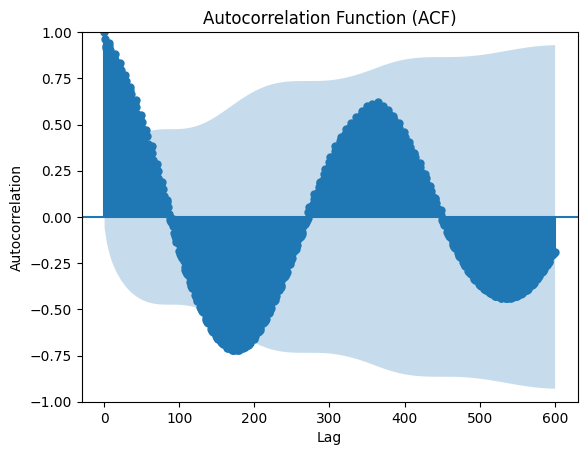

In [267]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(ts[TARGET_COLUMN], lags=600)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

Есть сезонность, потребление энергии пдает каждое лето и возрастает каждую зиму. следовательно, присутствует ежегодная (annual) сезонность.

In [268]:
ts['2011-02-01':'2011-05-01'][TARGET_COLUMN].plot()

Также можно заметить еженедельую сезонность. Каждую неделю есть небольшая яма в потреблении энергии

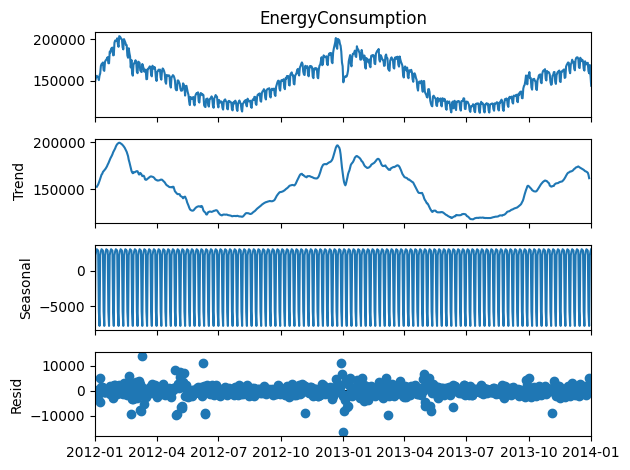

In [269]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ts[TARGET_COLUMN][365:], model='additive')
result.plot()
plt.show()

In [270]:
result.trend.plot()

присутствует тренд возрастающий и убывающий.

По граффикам ниже видно, что есть зависимость между Temp1, Temp2 и EnergyConsumption.

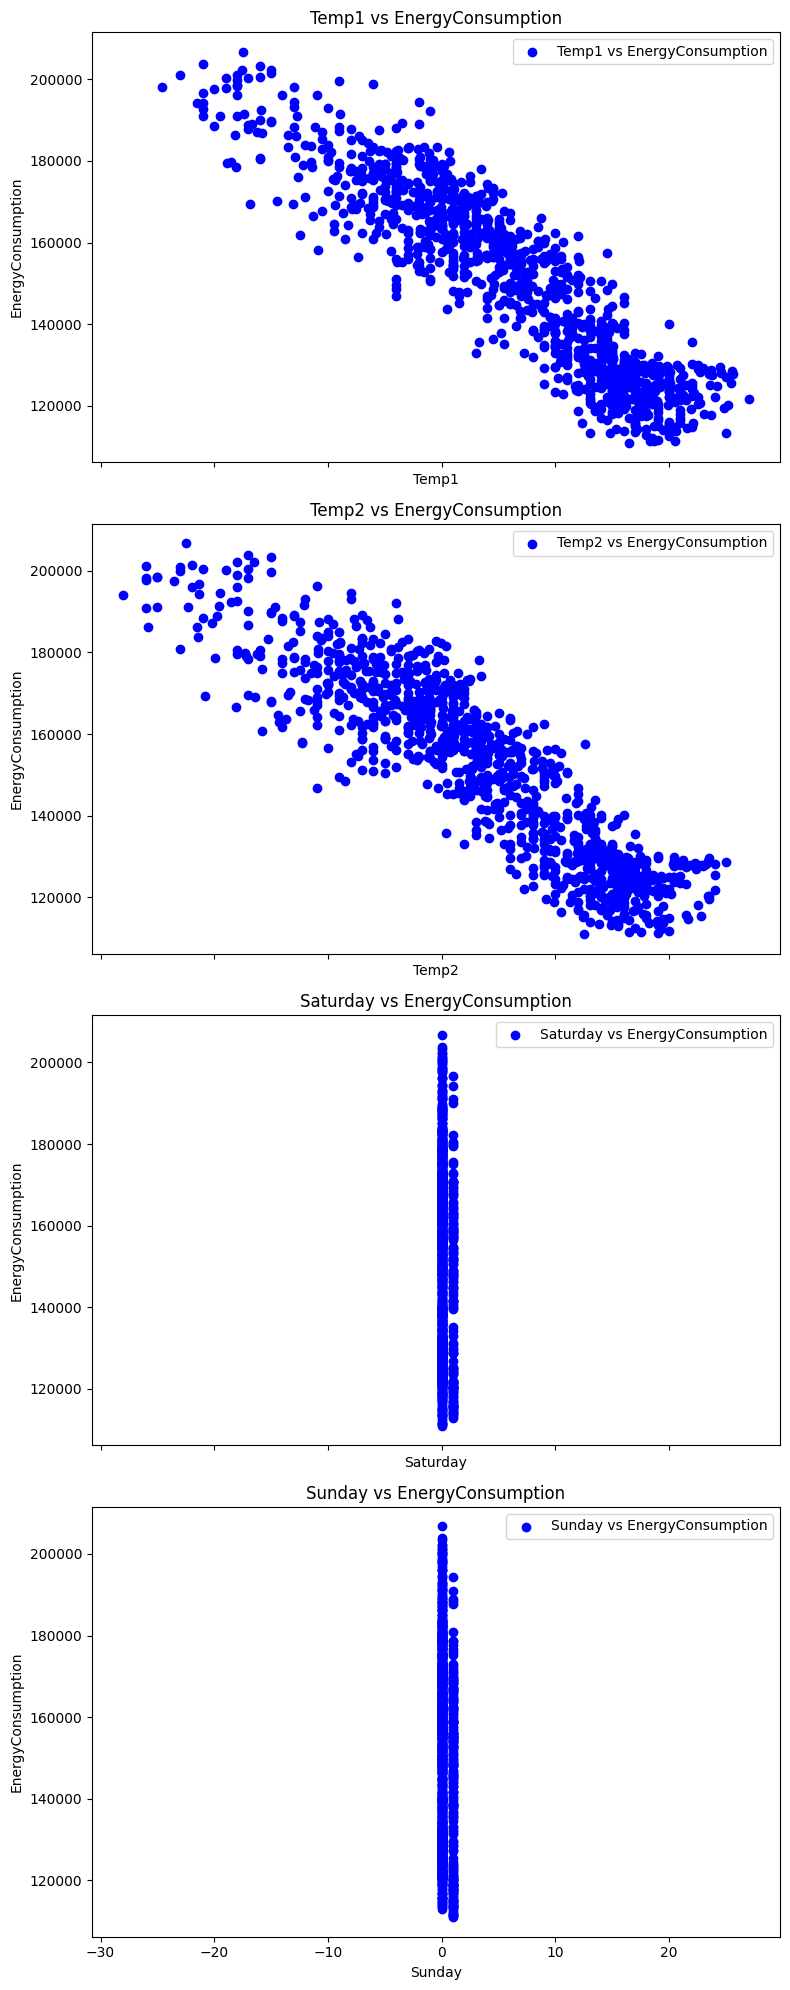

In [271]:
num_plots = len(OTHER_COLUMNS)

fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 5 * num_plots), sharex=True)

for i, col in enumerate(OTHER_COLUMNS):
    ax = axes[i] if num_plots > 1 else axes
    ax.scatter(ts[col], ts[TARGET_COLUMN], color='blue', label=f'{col} vs {TARGET_COLUMN}')
    ax.set_title(f'{col} vs {TARGET_COLUMN}')
    ax.set_xlabel(col)
    ax.set_ylabel(TARGET_COLUMN)
    ax.legend()

plt.tight_layout()
plt.show()

<h2 align="center">2. Fit ARIMA Model (50%) </h2>

**I. Build ARIMA forecast manually **

You should follow the next scheme:

 * 0) split the ts to two parts: first 80% of timestamps (ts1) and the last 20% of timestamps (ts2)   
 * 1) apply transformation to make the ts1 stationary;
 * 2) define exogenous variables and apply the transformations to them, if needed
 * 3) train simple ARIMA (0, 0, 0) with exogenous variables only, endog = 1) exog = 2);
 * 4) plot ACF/PACF for resifuals of the simple ARIMA(0, 0, 0) in order to understand which $p, P, q, Q$ can be used; define set of candidate parameters for ARMA (for the train TS);
 * 5) select the best parameters of the ARIMA models iteratively:
    * While there are significant ACF/PACF lags and ARIMA can be trained
      - change only one of 6 ARIMA parameters (p, d, q, P, D, Q)
      - compare the new model with the previous best model based on  AIC|BIC|HQIC
      - plot ACF/PACF of the best model

  **Note**: there is no goal to minimize AIC|BIC|HQIC, the goal is to exclude all significant autocorrelations from ACF/PACF.

* 6) Check  the best model residuals for
    - unbiasedness,
    - stationarity
    - non-autocorrelation
    - white noise hypothesis

    If all tests fail you need to review your choice.
* 7) Run analysis of the regression coafficients
    
    - if there are some insignificant regressors that can be eliminated, please exclude them from the model.

* 8) build forecast for the ts2 (you need to transform exogenous variables if you applied Box-Cox tranformations in step 1); plot this forecast on the same plot with original ts2 data
* 9) Calculate loss MAPE of your forecast. Does the forecast look appropriate?

In [272]:
split_ind = int(len(ts) * 0.8)

ts1 = ts.iloc[:split_ind]
ts2 = ts.iloc[split_ind:]
START_DATE = '2011-01-01'
SEP_DATE = '2013-05-26'
END_DATE = '2014-01-01'

In [273]:
ts1[TARGET_COLUMN].plot().update_layout(height=350, width=1300).show()

In [274]:
s_annual = 365
s_weekly = 7
sdiff_ts_annual = (ts - ts.shift(s_annual)).iloc[s_annual:]
diff_sdiff_ts_weekly = (sdiff_ts_annual  - sdiff_ts_annual.shift(s_weekly)).iloc[s_weekly:]
diff_sdiff_ts = (diff_sdiff_ts_weekly - diff_sdiff_ts_weekly.shift(1)).iloc[1:]

In [277]:
diff_sdiff_ts[TARGET_COLUMN].plot().update_layout(height=350, width=1300).show()

In [284]:
from statsmodels.tsa.stattools import adfuller

df_stat = adfuller(diff_sdiff_ts[TARGET_COLUMN])
print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ncritical values: %s' %
      (df_stat[0], df_stat[1], df_stat[2], df_stat[4]))
if df_stat[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

The Augmented Dickey-Fuller test statistic -9.410720, 
pvalue: 0.00 
maximal Lag: 20 
critical values: {'1%': -3.4396861854831964, '5%': -2.865660062273053, '10%': -2.5689640195342456}
The series is stationary.


In [285]:
from statsmodels.tsa import stattools

kpss_stat= stattools.kpss(np.array(diff_sdiff_ts[TARGET_COLUMN]))
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' %
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

The KPSS test statistic 0.019525, 
pvalue: 0.10 
maximal Lag: 2 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/var/folders/hr/f_2s6h151nd1d3z3jbvw4ngm0000gp/T/ipykernel_15668/1690626462.py:3: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




ARIMA:

In [286]:
import statsmodels.api as sm

def plot_acf_pacf(model, lags=365):
    fig = plt.figure(figsize=[25,5])
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(model.resid.values.squeeze(), lags=lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(model.resid.values.squeeze(), lags=lags, ax=ax2)

In [287]:
diff_sdiff_ts1 = diff_sdiff_ts[:-len(ts2)]
endog = diff_sdiff_ts1[TARGET_COLUMN]
exogs = diff_sdiff_ts1[OTHER_COLUMNS]
arma_mod00 = sm.tsa.ARIMA(endog=endog, order=[0,0,0], exog=exogs).fit()
print(arma_mod00.summary())

                               SARIMAX Results                                
Dep. Variable:      EnergyConsumption   No. Observations:                  504
Model:                          ARIMA   Log Likelihood               -4943.179
Date:                Fri, 28 Feb 2025   AIC                           9898.358
Time:                        00:57:15   BIC                           9923.694
Sample:                    01-09-2012   HQIC                          9908.296
                         - 05-26-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.2837    194.557     -0.022      0.982    -385.609     377.041
Temp1        -18.1938     43.128     -0.422      0.673    -102.724      66.336
Temp2        -41.3184     38.300     -1.079      0.2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



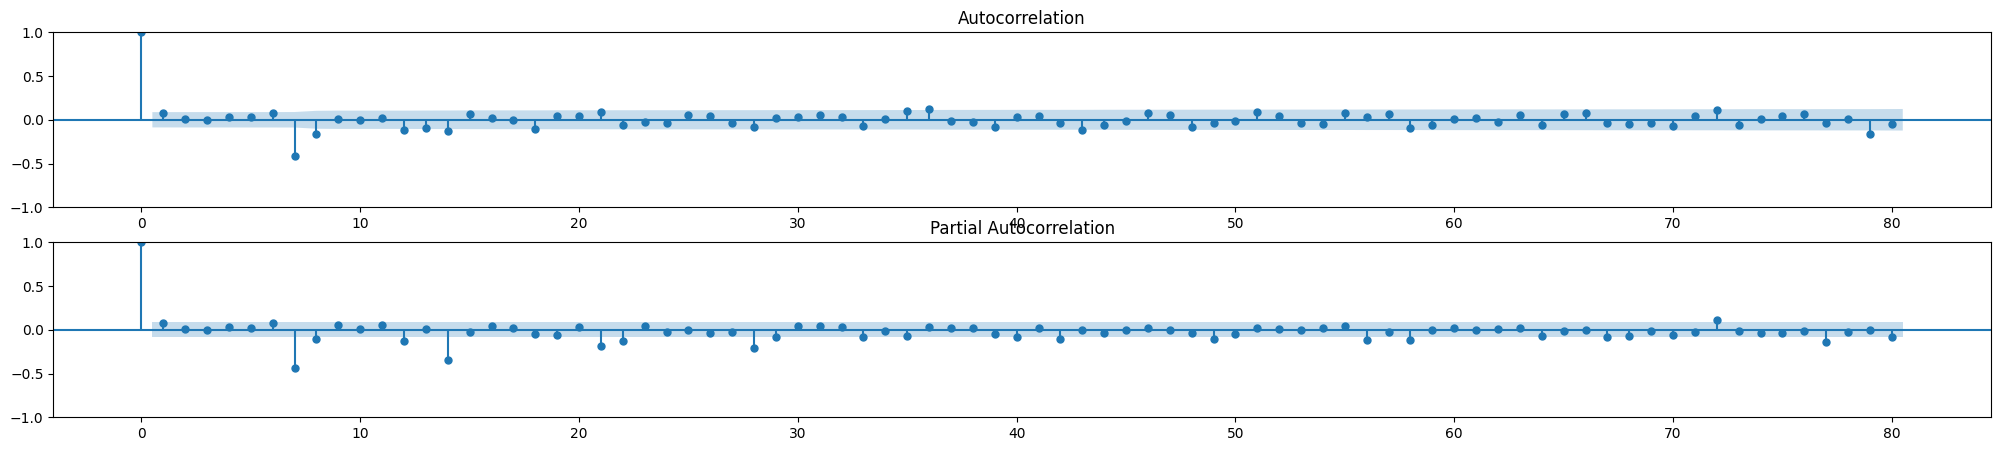

In [288]:
plot_acf_pacf(arma_mod00, 80)

7, 14, 21, 28, 35 - характерно для недельной сезонности

q = {0, 1, 6, 7} <p>
Q = {0, 1} <p>
p = {0, 1, 6, 7} <p>
P = {0, 1}

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                                 SARIMAX Results                                 
Dep. Variable:         EnergyConsumption   No. Observations:                  504
Model:             SARIMAX(0, 0, [1], 7)   Log Likelihood               -4813.423
Date:                   Fri, 28 Feb 2025   AIC                           9638.846
Time:                           00:57:39   BIC                           9664.182
Sample:                       01-09-2012   HQIC                          9648.784
                            - 05-26-2013                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -28.0632     48.880     -0.574      0.566    -123.867      67.741
Temp2        -50.1569     46.628     -1.076      0.282    -141.545      41.231
Saturday   -6571.7927   1146

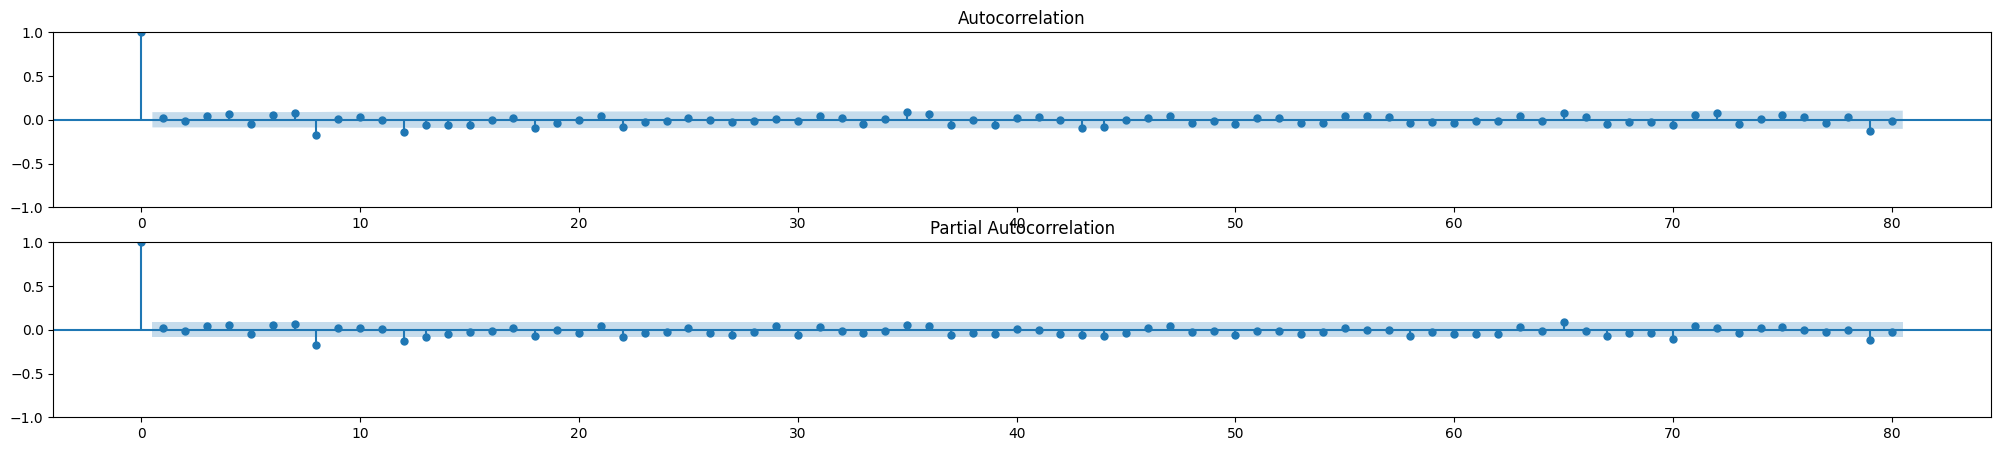

In [ ]:
arima_order_000_001 = sm.tsa.SARIMAX(endog=endog, order=[0,0,0], seasonal_order=[0,0,1,7], exog=exogs).fit()
print(arima_order_000_001.summary())
plot_acf_pacf(arima_order_000_001, 80)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                          SARIMAX Results                                          
Dep. Variable:                           EnergyConsumption   No. Observations:                  504
Model:             SARIMAX([1, 6, 7], 0, 0)x(0, 0, [1], 7)   Log Likelihood               -4815.804
Date:                                     Fri, 28 Feb 2025   AIC                           9649.608
Time:                                             00:57:47   BIC                           9687.611
Sample:                                         01-09-2012   HQIC                          9664.515
                                              - 05-26-2013                                         
Covariance Type:                                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -59.4926     55.762     -1.06

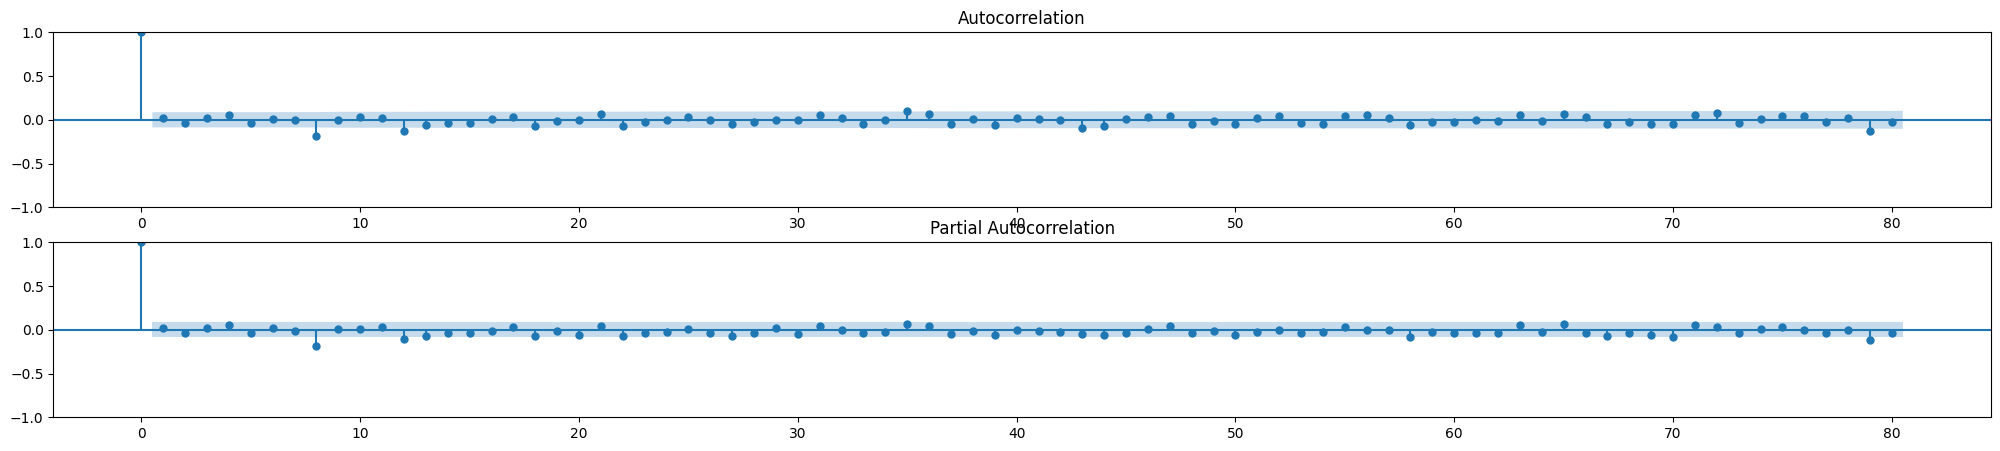

In [290]:
arima_order_600_001 = sm.tsa.SARIMAX(endog=endog, order=[(1,6,7),0,0], seasonal_order=[0,0,1,7], exog=exogs).fit()
print(arima_order_600_001.summary())
plot_acf_pacf(arima_order_600_001, lags=80)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                          SARIMAX Results                                          
Dep. Variable:                           EnergyConsumption   No. Observations:                  504
Model:             SARIMAX([1, 6, 8], 0, 0)x(1, 0, [1], 7)   Log Likelihood               -4818.787
Date:                                     Fri, 28 Feb 2025   AIC                           9657.575
Time:                                             00:57:54   BIC                           9699.801
Sample:                                         01-09-2012   HQIC                          9674.139
                                              - 05-26-2013                                         
Covariance Type:                                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1       -131.3650     55.976     -2.34

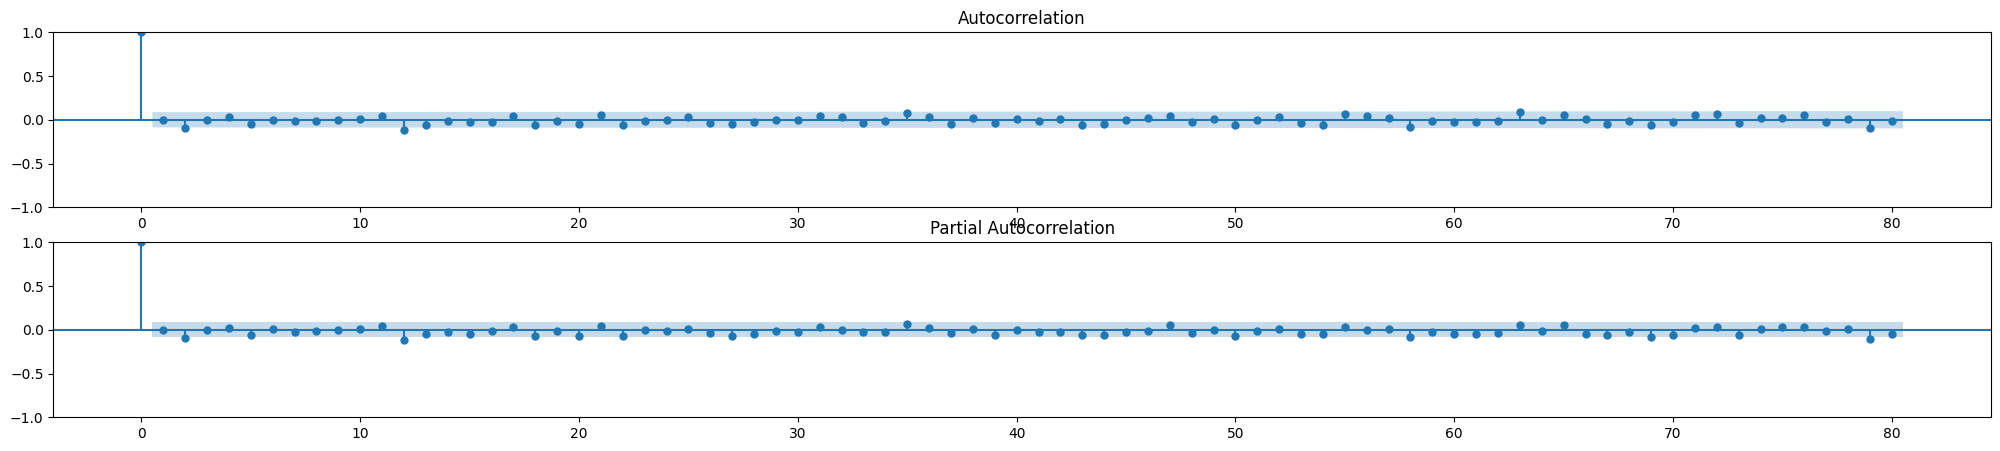

In [291]:
arima_order_168_101 = sm.tsa.SARIMAX(endog=endog, order=[(1,6,8),0,0], seasonal_order=[1,0,1,7], exog=exogs).fit()
print(arima_order_168_101.summary())
plot_acf_pacf(arima_order_168_101, lags=80)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                          SARIMAX Results                                          
Dep. Variable:                           EnergyConsumption   No. Observations:                  504
Model:             SARIMAX([2, 6, 8], 0, 0)x(1, 0, [1], 7)   Log Likelihood               -4823.555
Date:                                     Fri, 28 Feb 2025   AIC                           9667.109
Time:                                             00:57:59   BIC                           9709.335
Sample:                                         01-09-2012   HQIC                          9683.673
                                              - 05-26-2013                                         
Covariance Type:                                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1       -115.1557     68.353     -1.68

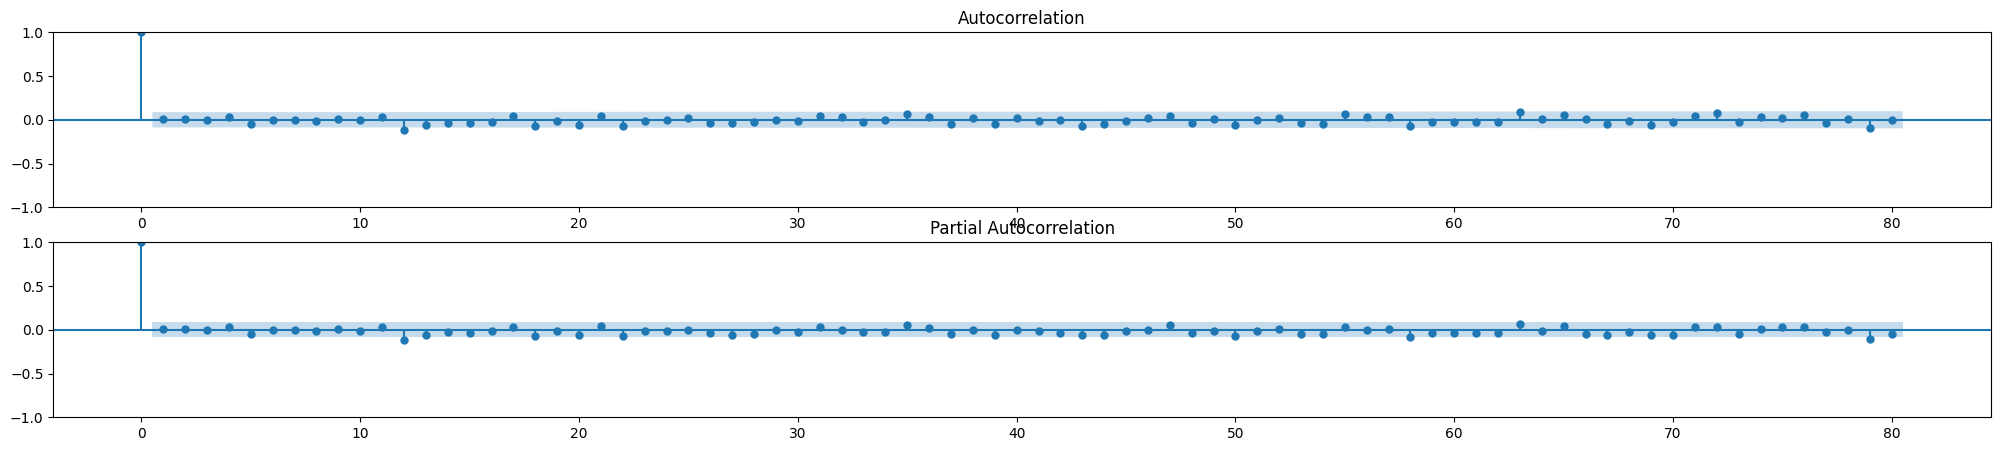

In [292]:
arima_order_268_101 = sm.tsa.SARIMAX(endog=endog, order=[(2,6,8),0,0], seasonal_order=[1,0,1,7], exog=exogs).fit()
print(arima_order_268_101.summary())
plot_acf_pacf(arima_order_268_101, lags=80)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                            SARIMAX Results                                             
Dep. Variable:                                EnergyConsumption   No. Observations:                  504
Model:             SARIMAX([2, 6, 8], 0, [1, 6])x(1, 0, [1], 7)   Log Likelihood               -4824.238
Date:                                          Fri, 28 Feb 2025   AIC                           9672.476
Time:                                                  00:58:07   BIC                           9723.147
Sample:                                              01-09-2012   HQIC                          9692.353
                                                   - 05-26-2013                                         
Covariance Type:                                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Te

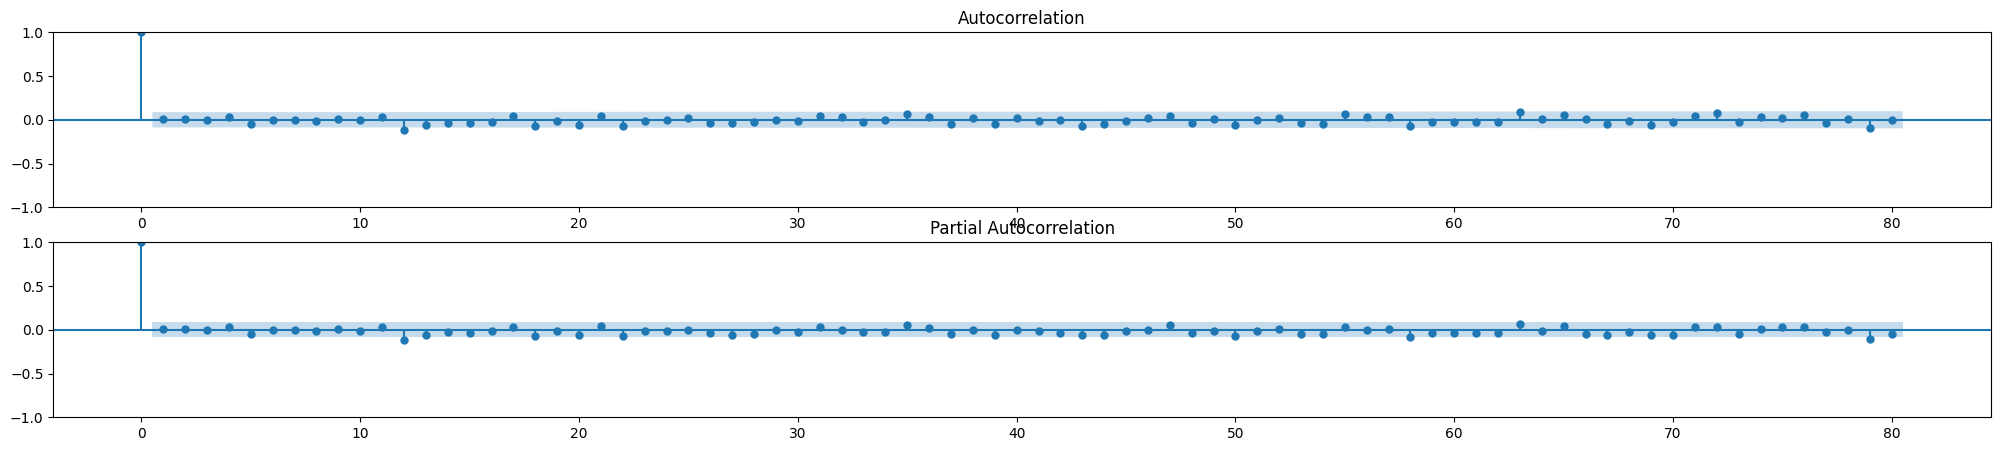

In [293]:
arima_order_268_16_101 = sm.tsa.SARIMAX(endog=endog, order=[(2,6,8),0,(1,6)], seasonal_order=[1,0,1,7], exog=exogs).fit()
print(arima_order_268_16_101.summary())
plot_acf_pacf(arima_order_268_101, lags=80)

In [294]:
best_model = arima_order_268_16_101

unbiasedness

In [295]:
from scipy import stats

stat, p = stats.wilcoxon(best_model.resid.values)
print('Statistic: %f\npvalue: %.2f' %(stat, p))

Statistic: 62009.000000
pvalue: 0.62


stationarity

In [296]:
df_stat = stattools.adfuller(best_model.resid.values)
print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ncritical values: %s' %
      (df_stat[0], df_stat[1], df_stat[2], df_stat[4]))

The Augmented Dickey-Fuller test statistic -8.437093, 
pvalue: 0.00 
maximal Lag: 7 
critical values: {'1%': -3.4436029548776395, '5%': -2.867384756137026, '10%': -2.5698830308597813}


In [297]:
kpss_stat= stattools.kpss(np.array(best_model.resid.values))
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' %
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

The KPSS test statistic 0.028991, 
pvalue: 0.10 
maximal Lag: 2 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/var/folders/hr/f_2s6h151nd1d3z3jbvw4ngm0000gp/T/ipykernel_15668/4044910425.py:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




non-autocorrelation

In [298]:
pd.DataFrame({'lags':range(30), 'pvalue':sm.stats.diagnostic.acorr_ljungbox(best_model.resid.values, lags=30)['lb_pvalue'],
              'critial':np.array([0.05]*30)}).set_index('lags').plot().update_layout(height=350, width=1300).show()

In [299]:
# Durbin-Watson statistic
# H0: residuals are not autocorrelated (https://www.statisticshowto.com/durbin-watson-test-coefficient/)
# Must be close or equal to 2
sm.stats.durbin_watson(best_model.resid.values)

1.9376414734725131

NormaltestResult(statistic=51.09196061390782, pvalue=8.044919779926136e-12)


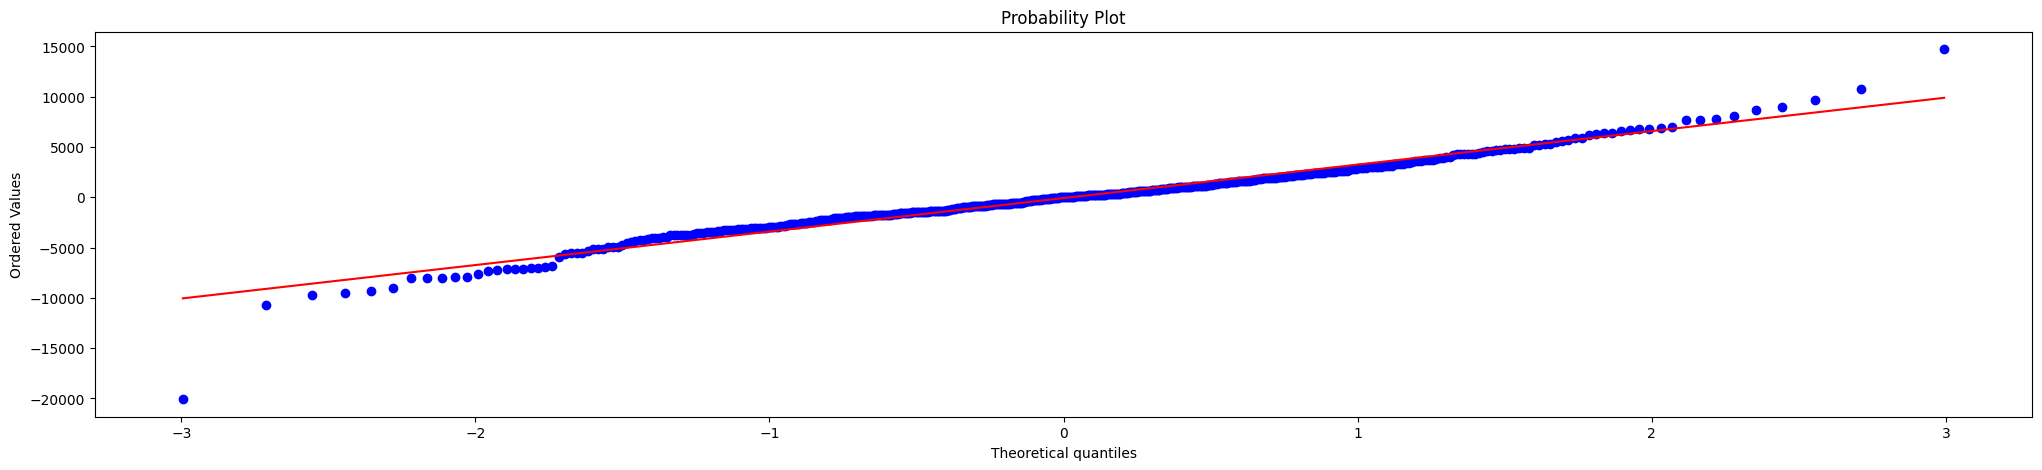

In [300]:
# Normaliry test
# H0: residuals are normally distributed
print(stats.normaltest(best_model.resid))

plt.figure(figsize=[25,5])
res = stats.probplot(best_model.resid, dist="norm", plot = plt)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                           SARIMAX Results                                           
Dep. Variable:                             EnergyConsumption   No. Observations:                  512
Model:             SARIMAX([2, 6], 0, [1, 6])x(1, 0, [1], 7)   Log Likelihood               -4929.514
Date:                                       Fri, 28 Feb 2025   AIC                           9881.029
Time:                                               00:59:02   BIC                           9927.650
Sample:                                           01-01-2012   HQIC                          9899.304
                                                - 05-26-2013                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1       -467.3258     

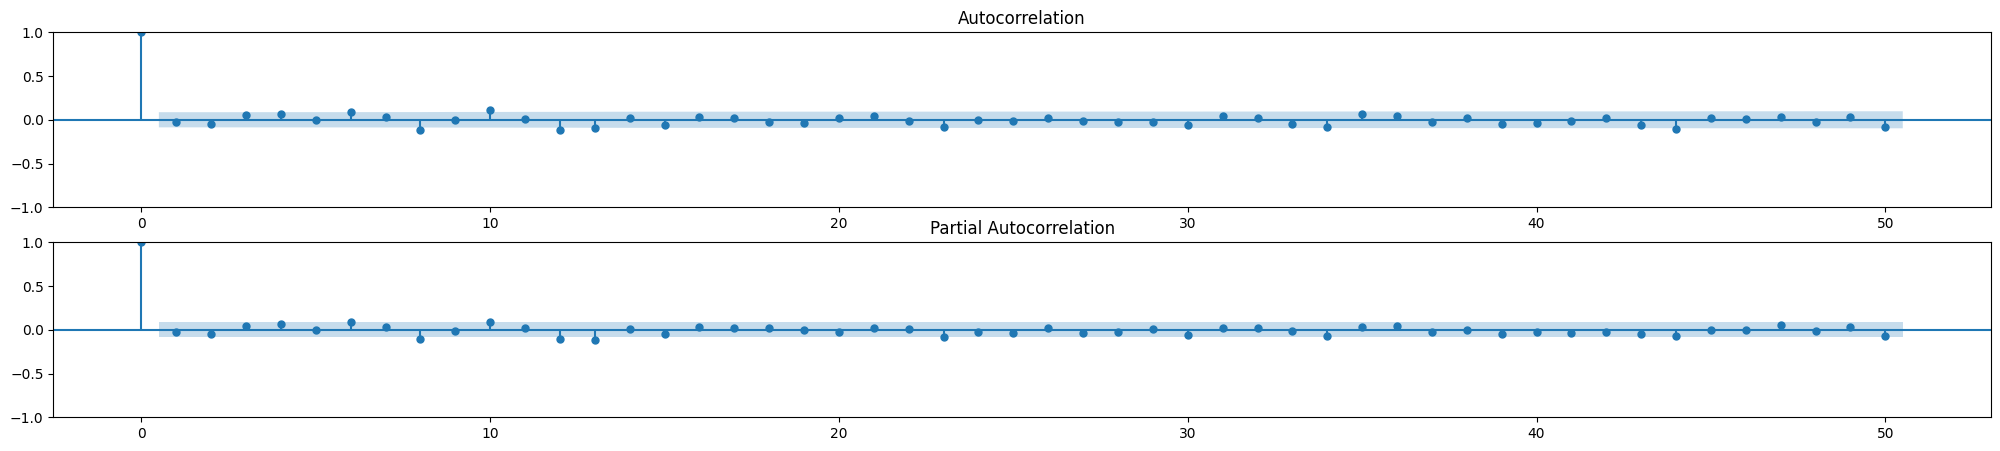

In [301]:
ts_sdiff_1 = sdiff_ts_annual[:-len(ts2)]
endog = ts_sdiff_1[TARGET_COLUMN]
exogs = ts_sdiff_1[OTHER_COLUMNS]
arima_best = sm.tsa.SARIMAX(endog=endog, order=[(2, 6),0,(1,6)], seasonal_order=[1,0,1,7], exog=exogs).fit()
print(arima_best.summary())
plot_acf_pacf(arima_best, lags=50)

In [302]:
def draw_arima_forecast(ts, arima_model, start_dt=0, end_dt=-1):
  predict = arima_model.get_prediction()
  forecast = pd.DataFrame(predict.predicted_mean).rename(columns = {'predicted_mean':'static_forecast'})
  forecast_ci = predict.conf_int().rename(columns = {'lower wage_boxcox':'l_ci_st',	'upper wage_boxcox':'u_ci_st'}) # confidence interval

  #  Dynamic predictions
  predict_dy = arima_model.get_prediction(dynamic=start_dt)
  forecast_dy = pd.DataFrame(predict_dy.predicted_mean).rename(columns = {'predicted_mean':'dynamic_forecast'})
  forecast_dy_ci = predict_dy.conf_int().rename(columns = {'lower wage_boxcox':'l_ci_dy',	'upper wage_boxcox':'u_ci_dy'}) # confidence interval

  if start_dt ==0:
    start_dt= ts.index.min()

  if end_dt == -1:
    end_dt = ts_wage_boxcox.index.max()

  # Plot data points and predictions
  fig = ts.loc[start_dt:].merge(
      forecast[start_dt:end_dt],
        how = 'left', left_index = True, right_index = True
        ).merge(
            forecast_dy[start_dt:],
            how = 'left', left_index = True, right_index = True
        ).merge(
          forecast_ci,
          how = 'left', left_index = True, right_index = True
        ).merge(
          forecast_dy_ci,
          how = 'left', left_index = True, right_index = True
        ).plot().update_layout(height=350, width=1300).show()

  return fig

In [303]:
start = '2012-01-01'
end = '2012-10-18'
draw_arima_forecast(ts_sdiff_1[[TARGET_COLUMN]], arima_best, start_dt=start, end_dt=end)

In [304]:
ts_sdiff_2 = sdiff_ts_annual[-len(ts2):]
exogs = ts_sdiff_2[OTHER_COLUMNS]
ts_frc = arima_best.forecast(steps=len(ts_sdiff_2), exog=exogs)
ts_frc_int = (ts_frc + ts.shift(365)[TARGET_COLUMN]).iloc[-len(ts2):] 

In [305]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=ts2[TARGET_COLUMN].index,
                        y=ts2[TARGET_COLUMN]
                        , name=TARGET_COLUMN))

fig.add_trace(go.Scatter(x=ts2[TARGET_COLUMN].index,
                        y=ts_frc_int
                        , name="arima best forecast"))

fig.add_trace(go.Scatter(x=ts2[TARGET_COLUMN].index,
                        y=ts2[['Sunday']].max(axis=1).replace(0, np.NaN)
                        , name="Saturday and Sunday", yaxis="y2"))
fig.add_trace(
    go.Scatter(x=ts2[TARGET_COLUMN].index,
                        y=ts2['Temp1']
                        , name="Temp1", yaxis="y3"))
fig.add_trace(
    go.Scatter(x=ts2[TARGET_COLUMN].index,
                        y=ts2['Temp2']
                        , name="Temp", yaxis="y3"))

fig.update_layout(
    xaxis=dict(domain=[0.1, 0.95]),
    yaxis=dict(
        title=TARGET_COLUMN,
    ),
    yaxis2=dict(
        title="Holidays",
        overlaying="y",
        side="right",
    ),
    yaxis3=dict(title="Temp", anchor="free", overlaying="y", autoshift=True),
)

fig.update_layout(height=500, width=1300).show()

In [306]:
from utils import qualityMAPE, qualityRMSE

# MAPE for the whole forecasting period
qualityMAPE(ts2[TARGET_COLUMN], ts_frc_int)[0]

0.03947403956219291

In [307]:
# MAPE for the first 3 months of the forecasting period
qualityMAPE(ts2[TARGET_COLUMN]['2013-05-26':'2013-08-26'], ts_frc_int['2013-05-26':'2013-08-26'])[0]

0.032928480633428014

в целом получилась неплохая модель, значения MAPE достаточно хорошие

<h2 align="center">2. Find the best ARIMA Model automatically (30%) </h2>

* 0) define candidates for $p, d, q, P, D, Q$ values  
* 1) Run grid search for ARIMA parameters (use ts1 from the previous section) according to AIC|BIC|HQIC, feel free to use your own approach how to define the best model based on AIC|BIC|HQIC. How many time does it take to fit all ARIMA?
* 2) Run Residuals and Coefficint analysis for the best model
  - If all tests fail you need to rebuild automatically selected model (you can do it manually).
  - if there are some insignificant regressors that can be eliminated, please exclude them from the model.
* 3) build forecast for the ts2 (you need to transform exogenous variables if you applied Box-Cox tranformations in step 1); plot this forecast on the same plot with original ts2 data
* 4) Calculate loss MAPE of your forecast. Which model manually generated or automatically generated is better?

In [308]:
import itertools

p = [1, 2, 6, 7, 8]
d = range(0, 2)
q = [1, 2, 6, 7, 8]

P = range(0, 2)
Q = range(0, 2)

pdq = [(x[0], 0, x[1]) for x in itertools.product(p, d, q)]
seasonal_pdq = [(x[0], 0, x[1], 7) for x in itertools.product(P, Q)]
endog = diff_sdiff_ts1[TARGET_COLUMN]
exogs = diff_sdiff_ts1[OTHER_COLUMNS]

In [309]:
best_aic = np.inf
best_bic = np.inf
best_hqic = np.inf
best_pdq_by_aic = None
best_pdq_by_bic = None
best_pdq_by_hqic = None

best_seasonal_pdq_by_aic = None
best_seasonal_pdq_by_bic = None
best_seasonal_pdq_by_hqic = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.SARIMAX(endog=endog, order=param, seasonal_order=param_seasonal, exog=exogs)
            results = model.fit()

            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq_by_aic = param
                best_seasonal_pdq_by_aic = param_seasonal

            if results.bic < best_bic:
                best_bic = results.bic
                best_pdq_by_bic = param
                best_seasonal_pdq_by_bic = param_seasonal

            if results.hqic < best_hqic:
                best_hqic = results.hqic
                best_pdq_by_hqic = param
                best_seasonal_pdq_by_hqic = param_seasonal

        except Exception as e:
            continue

print(f"AIC: SARIMA{best_pdq_by_aic}, {best_seasonal_pdq_by_aic} AIC={best_aic}")
print(f"BIC: SARIMA{best_pdq_by_bic}, {best_seasonal_pdq_by_bic} BIC={best_bic}")
print(f"HQIC: SARIMA{best_pdq_by_hqic}, {best_seasonal_pdq_by_hqic} HQIC={best_hqic}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency infor

AIC: SARIMA(1, 0, 0), (1, 0, 1, 7) AIC=9636.501094180823
BIC: SARIMA(1, 0, 0), (1, 0, 1, 7) BIC=9670.281704325394
HQIC: SARIMA(1, 0, 0), (1, 0, 1, 7) HQIC=9649.752038372919


In [311]:
pdq = [1, 0, 0]
seasonal_pdq = [1, 0, 1, 7]
ts_sdiff_1 = sdiff_ts_annual[:-len(ts2)]
endog = ts_sdiff_1[TARGET_COLUMN]
exogs = ts_sdiff_1[OTHER_COLUMNS]
model = sm.tsa.SARIMAX(endog=endog, order=pdq, seasonal_order=seasonal_pdq, exog=exogs).fit()

ts_sdiff_2 = sdiff_ts_annual[-len(ts2):]
exogs = ts_sdiff_2[OTHER_COLUMNS]
ts_frc = model.forecast(steps=len(ts_sdiff_2), exog=exogs)
ts_frc_int = (ts_frc + ts.shift(365)[TARGET_COLUMN]).iloc[-len(ts2):] 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [312]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=ts2[TARGET_COLUMN].index,
                        y=ts2[TARGET_COLUMN]
                        , name=TARGET_COLUMN))

fig.add_trace(go.Scatter(x=ts2[TARGET_COLUMN].index,
                        y=ts_frc_int
                        , name="arima best forecast"))

fig.add_trace(go.Scatter(x=ts2[TARGET_COLUMN].index,
                        y=ts2[['Sunday']].max(axis=1).replace(0, np.NaN)
                        , name="Saturday and Sunday", yaxis="y2"))
fig.add_trace(
    go.Scatter(x=ts2[TARGET_COLUMN].index,
                        y=ts2['Temp1']
                        , name="Temp1", yaxis="y3"))
fig.add_trace(
    go.Scatter(x=ts2[TARGET_COLUMN].index,
                        y=ts2['Temp2']
                        , name="Temp", yaxis="y3"))

fig.update_layout(
    xaxis=dict(domain=[0.1, 0.95]),
    yaxis=dict(
        title=TARGET_COLUMN,
    ),
    yaxis2=dict(
        title="Holidays",
        overlaying="y",
        side="right",
    ),
    yaxis3=dict(title="Temp", anchor="free", overlaying="y", autoshift=True),
)

fig.update_layout(height=500, width=1300).show()

In [313]:
qualityMAPE(ts2[TARGET_COLUMN], ts_frc_int)[0]

0.038737503963158164

In [314]:
qualityMAPE(ts2[TARGET_COLUMN]['2013-05-26':'2013-08-26'], ts_frc_int['2013-05-26':'2013-08-26'])[0]

0.031126826047743306

Модель подобранная с помощью СV получилась немного лучше